# Feature Selection

Applies selected feature selection statistical functions
or models on our 'df_artifact'.<br>
Each statistical function or model will vote for it's best K selected features.
If a feature has >= 'min_votes' votes, it will be selected.<br>

* **`context`**: the function context.
* **`k`**: number of top features to select from each statistical function or model.
* **`min_votes`**: minimal number of votes (from a model or by statistical function) needed for a feature to be selected. Can be specified by percentage of votes or absolute number of votes.
* **`label_column`**: ground-truth (y) labels.

* **`stat_filters`**: statistical functions to apply to the features (from sklearn.feature_selection).
                   
* **`model_filters`**: models to use for feature evaluation, can be specified by model name (ex. LinearSVC), formalized json (contains 'CLASS','FIT', 'META') or a path to such json file.
* **`max_scaled_scores`**: produce feature scores table scaled with max_scaler.
* **`sample_ratio`**: percentage of the dataset the user whishes to compute the feature selection process on.
* **`output_vector_name`**: creates a new feature vector containing only the identifies features.
* **`ignore_type_errors`**: skips datatypes that are neither float or int within the feature vector.
* **`is_feature_vector`**: `bool` stating if the data is passed as a feature vector.

In [1]:
import mlrun
import os

project_name = "function-marketplace"
project = mlrun.get_or_create_project(project_name, context="./", user_project=False)

> 2022-11-17 13:10:42,705 [info] loaded project function-marketplace from MLRun DB


In [4]:
# Declaring data url
TARGET_URL = 'https://s3.us-east-1.wasabisys.com/iguazio/data/function-marketplace-data/feature_selection/metrics.pq'

# Importing the function
fn = mlrun.import_function('hub://feature_selection')

# Running with parameters
run = fn.run(params={'k': 2,
                     'min_votes': 0.3,
                     'label_column': 'is_error'},
             inputs={'df_artifact': TARGET_URL},
            )

> 2022-11-17 13:18:38,711 [info] starting run feature-selection-feature_selection uid=4b7acc9c754d436aa9d993d908fc911c DB=http://mlrun-api:8080
> 2022-11-17 13:18:39,376 [info] Job is running in the background, pod: feature-selection-feature-selection-m5ln4
> 2022-11-17 13:20:08,362 [info] votes needed to be selected: 2
> 2022-11-17 13:20:08,621 [info] run executed, status=completed
Liblinear failed to converge, increase the number of iterations.
Converting input from bool to <class 'numpy.uint8'> for compatibility.
final state: completed


project,uid,iter,start,state,name,labels,inputs,parameters,results,artifacts
function-marketplace,...08fc911c,0,Nov 17 13:20:03,completed,feature-selection-feature_selection,kind=jobowner=jovyanmlrun/client_version=1.1.1host=feature-selection-feature-selection-m5ln4,df_artifact,k=2min_votes=0.3label_column=is_error,,f_classifmutual_info_classifchi2f_regressionLinearSVCLogisticRegressionExtraTreesClassifierfeature_scoresmax_scaled_scores_feature_scoresselected_features_countselected_features


> 2022-11-17 13:20:08,811 [info] run executed, status=completed


### Output Visualization

In [11]:
# selected features
run.artifact('selected_features').as_df()

cpu_utilization  \
timestamp               company     data_center     device                           
2021-04-27 14:46:46.780 Smith_Group Denise_Crest    5124209057231        75.598891   
                                                    2891755865712        50.090373   
                                    Debra_Gateway   0388020295311        73.243063   
                                                    9633813691441        60.830420   
                        Ferrell_Ltd Murphy_Meadow   1517129765931        72.647964   
...                                                                            ...   
2021-04-27 15:46:46.780 Smith_Group Debra_Gateway   9633813691441        77.875954   
                        Ferrell_Ltd Murphy_Meadow   1517129765931        77.831459   
                                                    6964486699383        55.978514   
                                    Nicholas_Estate 8002897098167        58.265446   
                                                    8499880735104        71.245041   

                                                                   packet_loss  \
timestamp               company     data_center     device                       
2021-04-27 14:46:46.780 Smith_Group Denise_Crest    5124209057231     0.000000   
                                                    2891755865712     0.000000   
                                    Debra_Gateway   0388020295311     2.170138   
                                                    9633813691441     2.295717   
                        Ferrell_Ltd Murphy_Meadow   1517129765931     0.000000   
...                                                                        ...   
2021-04-27 15:46:46.780 Smith_Group Debra_Gateway   9633813691441     0.000000   
                        Ferrell_Ltd Murphy_Meadow   1517129765931     0.000000   
                                                    6964486699383     0.533963   
                                    Nicholas_Estate 8002897098167     2.048268   
                                                    8499880735104     2.929407   

                                                                   throughput  \
timestamp               company     data_center     device                      
2021-04-27 14:46:46.780 Smith_Group Denise_Crest    5124209057231  252.445971   
                                                    2891755865712  229.889187   
                                    Debra_Gateway   0388020295311  260.883807   
                                                    9633813691441  244.238613   
                        Ferrell_Ltd Murphy_Meadow   1517129765931  212.944943   
...                                                                       ...   
2021-04-27 15:46:46.780 Smith_Group Debra_Gateway   9633813691441  245.150281   
                        Ferrell_Ltd Murphy_Meadow   1517129765931  235.109321   
                                                    6964486699383  277.622402   
                                    Nicholas_Estate 8002897098167  272.717982   
                                                    8499880735104  235.659211   

                                                                   is_error  
timestamp               company     data_center     device                   
2021-04-27 14:46:46.780 Smith_Group Denise_Crest    5124209057231     False  
                                                    2891755865712     False  
                                    Debra_Gateway   0388020295311     False  
                                                    9633813691441     False  
                        Ferrell_Ltd Murphy_Meadow   1517129765931     False  
...                                                                     ...  
2021-04-27 15:46:46.780 Smith_Group Debra_Gateway   9633813691441     False  
                        Ferrell_Ltd Murphy_Meadow   1517129765931     False  
                                               

In [14]:
run.artifact('feature_scores').show()

,f_classif,mutual_info_classif,chi2,f_regression,LinearSVC,LogisticRegression,ExtraTreesClassifier
cpu_utilization,2520.015809,0.183663,4457.429360,2520.015809,-0.040482,-0.178632,0.024663
latency,10152.151995,0.195851,272872.890194,10152.151995,0.025948,0.104103,0.024663
packet_loss,14120.490547,0.207517,157191.427524,14120.490547,0.055658,0.214212,0.024663
throughput,20421.721030,0.230400,109129.511665,20421.721030,-0.015741,-0.084308,0.024663



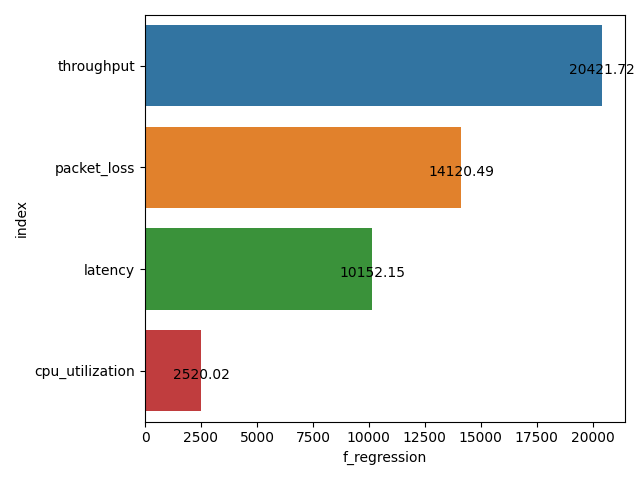

In [17]:
run.artifact('f_regression').show()